In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Dense,Activation,Flatten,ZeroPadding2D,Conv2D,BatchNormalization
from keras.layers import AveragePooling2D,MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D,Dropout
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image

In [3]:
from keras.utils import layer_utils
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG


In [4]:
path1="C:\dataset 2"
path2="C:\dataset 2 after preprocessing"


In [5]:
listing=os.listdir(path1)

In [6]:
path3="C:\dataset 2 after preprocessing vgg19"
for file in listing:
    im=Image.open(path1 +'\\'+ file)
    im=im.resize((224,224))
    im.save(path3 + '\\'+ file,"JPEG")

In [7]:
list3=os.listdir(path3)

In [8]:
immatrix_new=np.array([np.array(Image.open('C:\dataset 2 after preprocessing vgg19' + '\\'+ i)).flatten() for i in list3],'f')

In [9]:
label=np.ones((immatrix_new.shape[0],),dtype=int)

In [10]:
label[0:14]=0
label[14:25]=1
label[25:36]=2
label[36:49]=3
label[49:]=4

In [11]:
d,l=shuffle(immatrix_new,label,random_state=2)

In [12]:
train=[d,l]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


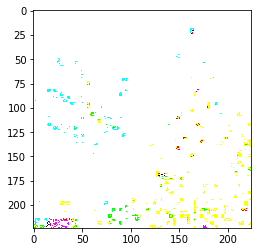

In [13]:
img=immatrix_new[1].reshape(224,224,3)
plt.imshow(img)

In [14]:
print(train[0].shape,train[1].shape)
X,Y=(train[0],train[1])
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.4,random_state=3)

(56, 150528) (56,)


In [15]:
train_x=train_x.reshape(train_x.shape[0],224,224,3)
test_x=test_x.reshape(test_x.shape[0],224,224,3)

In [16]:
train_x.astype('float32')
test_x.astype('float32')
train_x/=255
test_x/=255

In [17]:
train_y=np_utils.to_categorical(train_y,5)
test_y=np_utils.to_categorical(test_y,5)


In [18]:
print(train_y.shape)
print(test_y.shape)

(33, 5)
(23, 5)


In [19]:
#vgg19 net
model=Sequential()

#Block1
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(224,224,3)))
convout1=Activation('relu')
model.add(convout1)
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same"))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D((2,2),strides=(2,2)))


#Block2
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same"))
convout3=Activation('relu')
model.add(convout3)
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same"))
convout4=Activation('relu')
model.add(convout4)
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Block3
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
convout5=Activation('relu')
model.add(convout5)
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
convout6=Activation('relu')
model.add(convout6)
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
convout7=Activation('relu')
model.add(convout7)
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
convout8=Activation('relu')
model.add(convout8)
model.add(MaxPooling2D((2,2),strides=(2,2)))


#Block4
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout9=Activation('relu')
model.add(convout9)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout10=Activation('relu')
model.add(convout10)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout11=Activation('relu')
model.add(convout11)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout12=Activation('relu')
model.add(convout12)
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Block5
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout13=Activation('relu')
model.add(convout13)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout14=Activation('relu')
model.add(convout14)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout15=Activation('relu')
model.add(convout15)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout16=Activation('relu')
model.add(convout16)
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=["accuracy"])


In [20]:
model.fit(train_x,train_y,epochs=100,batch_size=11,validation_data=(test_x,test_y))

Train on 33 samples, validate on 23 samples
Epoch 1/100
33/33 [==============================] - 91s 3s/step - loss: 1.6086 - acc: 0.2727 - val_loss: 1.6069 - val_acc: 0.2609
Epoch 2/100
33/33 [==============================] - 9157s 277s/step - loss: 1.6160 - acc: 0.2424 - val_loss: 1.6086 - val_acc: 0.1739
Epoch 3/100
33/33 [==============================] - 92s 3s/step - loss: 1.6284 - acc: 0.2727 - val_loss: 1.6064 - val_acc: 0.2609
Epoch 4/100
33/33 [==============================] - 96s 3s/step - loss: 1.5981 - acc: 0.2424 - val_loss: 1.6083 - val_acc: 0.1739
Epoch 5/100
33/33 [==============================] - 93s 3s/step - loss: 1.5962 - acc: 0.2727 - val_loss: 1.6096 - val_acc: 0.1739
Epoch 6/100
33/33 [==============================] - 87s 3s/step - loss: 1.5950 - acc: 0.2727 - val_loss: 1.6105 - val_acc: 0.1739
Epoch 7/100
33/33 [==============================] - 83s 3s/step - loss: 1.5896 - acc: 0.1818 - val_loss: 1.6142 - val_acc: 0.1739
Epoch 8/100
33/33 [================

Epoch 63/100
33/33 [==============================] - 79s 2s/step - loss: 1.5884 - acc: 0.2727 - val_loss: 1.6200 - val_acc: 0.1739
Epoch 64/100
33/33 [==============================] - 80s 2s/step - loss: 1.5863 - acc: 0.2727 - val_loss: 1.6211 - val_acc: 0.1739
Epoch 65/100
33/33 [==============================] - 79s 2s/step - loss: 1.5876 - acc: 0.2727 - val_loss: 1.6199 - val_acc: 0.1739
Epoch 66/100
33/33 [==============================] - 79s 2s/step - loss: 1.5868 - acc: 0.2727 - val_loss: 1.6175 - val_acc: 0.1739
Epoch 67/100
33/33 [==============================] - 79s 2s/step - loss: 1.5969 - acc: 0.2727 - val_loss: 1.6196 - val_acc: 0.1739
Epoch 68/100
33/33 [==============================] - 79s 2s/step - loss: 1.5907 - acc: 0.2727 - val_loss: 1.6188 - val_acc: 0.1739
Epoch 69/100
33/33 [==============================] - 80s 2s/step - loss: 1.5839 - acc: 0.2727 - val_loss: 1.6197 - val_acc: 0.1739
Epoch 70/100
33/33 [==============================] - 87s 3s/step - loss: 1.

In [22]:
score=model.evaluate(test_x,test_y)
print("test score",score[0])
print("test accuracy",score[1])
print(model.predict_classes(test_x[1:5]))
print(test_y[1:5])


23/23 [==============================] - 15s 642ms/step
test score 1.62190592289
test accuracy 0.173913046718
[3 3 3 3]
[[ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]]


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
activation_3 (Activation)    (None, 112, 112, 128)     0         
__________